# Initial Statistical Analysis with [DPD](https://github.com/ottok92/Python_TidyData.git "Data Profile DataFrame by A. Varatharajah @github") Extensions

The game changer for exploratory data analysis is the final ***Data Profile Dataframe*** that is generated which combines ***all*** the information required to inform data cleaning, tidy data and optimisations (memory and processing) decisions.  
Instead of using various Pandas commands at different instances and going back and forth to cross refer information, Data Profile Dataframe brings all information into a single dataframe. This will be very useful when reviewing the data profile with the business subject matter or other team members as all information related to data profile is in a single easy to understand format.


Understanding the data is **the critical step** in preparing the data to be used for analytics. As many experts will point out the data preparation and transforming the data into a tidy format takes about 80% of the effort in any data analytics or data analysis project.<br>
***Understanding the data requires good understanding of the domain and/or access to a subject matter expert (SME) to help make decisions about data quality and data usage:***
* What are the columns and what do they mean?
* How to interpret each columns and possible values of a column?
* Should the columns be renamed (and cleaned e.g. trim)?
* Are there columns that may have similar information that could be dropped in favour of one master column?
* Can columns with no values (or all empty) be dropped?
* Can columns which have more than certain threshold of blank values be dropped?
* How can the missing values be filled and can it be filled meaningfully?
* Can rows that have missing values for certain columns or combination of columns be dropped? i.e. the row is meaningless wihtout those values.
* Can the numeric data type columns be converted / down casted to optimise memory usage based on the data values?
    - or will there be outliers possibly in future data sets that we cannot do this?
    - can the min and max values be used to determine the lowest possible data type?
* Can some string/object columns be converted to Category types?
    - based on count of unique values
* Can any columns be discarded that may not be required for analytics?

## 1. Environment Setup

It is recommended best practice to document the execution environment.  
e.g. When the initial version of this notebook was developed in Azure Notebooks (Jupyter) the environment was documented in the code. When the notebook was exported to local PC JupyterLab and then imported back into Azure Notebook, the Kernal changed to an older version and some code did not work. Having the initital versions documented in comments saved a lot of effort in trying to understand what went wrong.


In [1]:
# Import the graph packages
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline

import seaborn as sns
# Seabotn version   0.9.0 in Azure Notebooks in April 2019
# use sns.__version__ to get the pandas version. This is used in the final DPD HTML

# Get the date of execution
import datetime
date_generated = datetime.datetime.now()


from platform import python_version 
# use python_version() to get the version. This is used in the final DPD HTML
# 3.6.6 in Azure Notebooks in April 2019


import pandas as pd
# use pd.__version__ to get the pandas version. This is used in the final DPD HTML
# Pandas version   0.22.0 in Azure Notebooks in April 2019

# set maximum number of columns to display in notebook
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)

# To check whether a column is numeric type
from pandas.api.types import is_numeric_dtype

# To check whether a column is object/string type
from pandas.api.types import is_string_dtype


import numpy as np
import json
from ipywidgets import widgets

## 2. Load and Transform Dataset

The raw data file used in this notebook has been derived from the Sales Products csv file from IBM Analytics Community and has been modified to include untidy data for the purposes of this data exploration work.  
The raw data should be in a format that can be laoded into pandas. i.e. if there are any rows need to be skipped,  column headers mapped, etc. should be handle in the pandas.read code block.

In [2]:
# loads the column description dictionary
with open('../assets/transformed/dict_column_descriptions.json', 'r') as fp:
    col_desc = json.load(fp)

# loads the data file into a dataframe
try:
    df = pd.read_pickle('../assets/transformed/sample100_orderedctgs.pk')
except:
    print("Error: Data file not found!")

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3,1,Gd,8.0,Typ,0.0,NaN,Attchd,2003,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,2008,WD,Normal,208500
2,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3,1,TA,6.0,Typ,1.0,TA,Attchd,1976,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,5.0,2007,WD,Normal,181500
3,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3,1,Gd,6.0,Typ,1.0,TA,Attchd,2001,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,9.0,2008,WD,Normal,223500
4,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,NaN,NaN,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3,1,Gd,7.0,Typ,1.0,Gd,Detchd,1998,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,2006,WD,Abnorml,140000
5,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4,1,Gd,9.0,Typ,1.0,TA,Attchd,2000,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,12.0,2008,WD,Normal,250000


#### Sample data rows from dataset: 

In [3]:
df.sample(5).round(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
23,20,RL,75.0,9742.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2002,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,281.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1777.0,1777.0,GasA,Ex,Y,SBrkr,1795.0,0.0,0.0,1795.0,0.0,0.0,2.0,0.0,3,1,Gd,7.0,Typ,1.0,Gd,Attchd,2002,RFn,2.0,534.0,TA,TA,Y,171.0,159.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,9.0,2008,WD,Normal,230000
48,20,FV,84.0,11096.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,24.0,Unf,0.0,1632.0,1656.0,GasA,Ex,Y,SBrkr,1656.0,0.0,0.0,1656.0,0.0,0.0,2.0,0.0,3,1,Gd,7.0,Typ,0.0,NaN,Attchd,2006,RFn,3.0,826.0,TA,TA,Y,0.0,146.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,7.0,2007,WD,Normal,249700
85,80,RL,NaN,8530.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,1995,1996,Gable,CompShg,HdBoard,HdBoard,BrkFace,22.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,804.0,670.0,0.0,1474.0,0.0,0.0,2.0,1.0,3,1,TA,7.0,Typ,1.0,TA,BuiltIn,1995,Fin,2.0,400.0,TA,TA,Y,120.0,72.0,0.0,0.0,0.0,0.0,NaN,NaN,Shed,700.0,5.0,2009,WD,Normal,168500
8,60,RL,NaN,10382.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107.0,983.0,0.0,2090.0,1.0,0.0,2.0,1.0,3,1,TA,7.0,Typ,2.0,TA,Attchd,1973,RFn,2.0,484.0,TA,TA,Y,235.0,204.0,228.0,0.0,0.0,0.0,NaN,NaN,Shed,350.0,11.0,2009,WD,Normal,200000
88,160,FV,40.0,3951.0,Pave,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,Stone,76.0,Gd,TA,PConc,Gd,TA,Av,Unf,0.0,Unf,0.0,612.0,612.0,GasA,Ex,Y,SBrkr,612.0,612.0,0.0,1224.0,0.0,0.0,2.0,1.0,2,1,Gd,4.0,Typ,0.0,NaN,Detchd,2009,RFn,2.0,528.0,TA,TA,Y,0.0,234.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,6.0,2009,New,Partial,164500


In [4]:
# Number of rows of the DPD will be the count of columns in the raw date dataframe
# Since it there will be one row for each column
no_of_rows = len(df.columns)


# Constructing the data_qlt_df dataframe and pre-assigning and columns
# Pre-assigning the number of rows the dataframe would have is memory and processing efficient
# This is a better approach than continuous append or concat operation to dataframe

data_qlt_df = pd.DataFrame(index=np.arange(0, no_of_rows), \
                            columns=('column_name', 'col_data_type','non_null_values', \
                                     'unique_values_count', 'column_dtype')
                          )


# Add rows to the data_qlt_df dataframe
for ind, cols in enumerate(df.columns):
    # Count of unique values in the column
    col_unique_count = df[cols].nunique()
    
    data_qlt_df.loc[ind] = [cols, \
                            df[cols].dtype, \
                            df[cols].count(), \
                            col_unique_count, \
                            cols + '~'+ str(df[cols].dtype)
                            ]


In [5]:
# Use describe() to get column stats of raw dataframe
# This will be merged with the DPD
raw_num_df = df.describe().T.round(2)


In [6]:
#----- Key Step ---------------
# Merging the df.describe() output with rest of the info to create a single Data Profile Dataframe
data_qlt_df = pd.merge(data_qlt_df, raw_num_df, how='left', left_on='column_name', right_index=True)


In [7]:
# Calculate percentage of non-null values over total number of values
data_qlt_df['%_of_non_nulls'] = (data_qlt_df['non_null_values']/df.shape[0])*100

# Calculate null values for the column
data_qlt_df['null_values'] = df.shape[0] - data_qlt_df['non_null_values']

# Calculate percentage of null values over total number of values
data_qlt_df['%_of_nulls'] = 100 - data_qlt_df['%_of_non_nulls']

# Calculate the total memory used by a given group of data type
# See Notes section at the bottom of this notebook for advatages of using 'transform' function with group_by
try:
    data_qlt_df["dtype_total"] = data_qlt_df.groupby('col_data_type')["col_memory"].transform('sum')
except Exception:
    pass

# Calculate the percentage memory used by each column data type compared to the total memory used by the group of data type
# the above can be merged to one calculation if we do not need the total as separate column
#data_qlt_df["%_of_dtype_mem2"] = data_qlt_df["Dtype Memory"] / (data_qlt_df.groupby('Data Type')["Dtype Memory"].transform('sum')) * 100
try:
    data_qlt_df["%_of_dtype_mem"] = data_qlt_df["col_memory"] / data_qlt_df["dtype_total"] * 100
except Exception:
    pass

# Calculate the percentage memory used by each group of data type of the total memory used by dataset
try:
    data_qlt_df["dtype_%_total_mem"] = data_qlt_df["dtype_total"] / df_mem * 100

except Exception:
    pass
# Calculate the count of each data type
try:
    data_qlt_df["dtype_count"] = data_qlt_df.groupby('col_data_type')["col_data_type"].transform('count')

except Exception:
    pass
# Calculate the total count of column values
try:
    data_qlt_df["count"] = data_qlt_df['null_values'] + data_qlt_df['non_null_values']

except Exception:
    pass

In [8]:
# # EXTRA profilers, not needed for now
# # Reorder the Data Profile Dataframe columns
# data_qlt_df = data_qlt_df[
#                             ['column_name', 'col_data_type', 'col_memory', '%_of_dtype_mem', '%_of_total_memory',\
#                              'dtype_count', 'dtype_total', 'dtype_%_total_mem', 'non_null_values', '%_of_non_nulls',\
#                              'null_values', '%_of_nulls', 'unique_values_count', 'count', 'mean', 'std', 'min', '25%',\
#                              '50%', '75%', 'max']
#                          ]

# Reorder the Data Profile Dataframe columns
data_qlt_df = data_qlt_df[
                            ['column_name', 'col_data_type',\
                             'non_null_values', '%_of_non_nulls',\
                             'null_values', '%_of_nulls', 'unique_values_count', 'count', 'mean', 'std', 'min', '25%',\
                             '50%', '75%', 'max']
                        ]

**The above data quality data frame summarises all information required for making data quality decisions.**  
Though there are info() and describe() methods to do these, having all the relvant information in one dataframe makes the data quality exploration much easier. This dataframe can be used for summarising information and for plotting to ehnace the ease of Data Understanding effort.

# 3.1. Profile Graphs for Numerical features

In [9]:
import numpy as np
from matplotlib.patches import Rectangle

# Get the list of numeric columns from raw dataframe
# need this: from pandas.api.types import is_numeric_dtype
# get numeric columns which are not empty
num_cols = [cols for cols in df.columns if is_categorical_dtype(df[cols]) and len(df[cols].dropna())>0]

iter_len = len(num_cols)
graphs_dict = {'numerical': {}, 'categorical': {}}

# For each numeric column in the list
for x, col_name in enumerate(num_cols):
    print(x+1, " of ", iter_len, " completed   ",  col_name)
    
    # Create a copy of the column values without nulls or NA
    no_null_col = df[col_name].dropna()
    
    
    # Calculate the 95 percentile of the values
    q25 = np.percentile(no_null_col, 25)
    q75 = np.percentile(no_null_col, 75)    
    q95 = np.percentile(no_null_col, 95)
    
    # Plot the graphs
    fig3 = plt.figure(figsize=(20,15))
    fig3.suptitle("Profile of column  " + col_name, fontsize=25)  #Title for the whole figure
    plt.subplots_adjust(wspace=0.4, hspace=0.35)

    ax1 = fig3.add_subplot(2,3,1)
    ax1.set_title("Box plot for all the values", fontsize=20)
    plt.setp(ax1.get_xticklabels(), ha="right", rotation=35)
    plt.setp(ax1.get_yticklabels(), ha="right", fontsize=15)
    ax1.boxplot(no_null_col)

    ax1 = fig3.add_subplot(2,3,2)
    ax1.set_title("Distribution of all values", fontsize=20)
    plt.setp(ax1.get_xticklabels(), ha="right", rotation=35, fontsize=15)
    plt.setp(ax1.get_yticklabels(), ha="right", fontsize=15)
    ax1.hist(no_null_col)

    ax1 = fig3.add_subplot(2,3,3)
    ax1.set_title("Boxplot for quartiles (all values)", fontsize=20)
    if len(no_null_col.value_counts()) >= 4:
        df[u'quartiles'] = pd.qcut(
                        df[col_name],
                        4, duplicates='drop')
        df.boxplot(column= col_name, by=u'quartiles', ax = ax1)
    plt.setp(ax1.get_xticklabels(), ha="right", rotation=35, fontsize=15)
    plt.setp(ax1.get_yticklabels(), ha="right", fontsize=15)

    ax1 = fig3.add_subplot(2,3,4)
    ax1.set_title("Box plot without outliers", fontsize=20)
    plt.setp(ax1.get_xticklabels(), ha="right", rotation=35, fontsize=15)
    plt.setp(ax1.get_yticklabels(), ha="right", fontsize=15)
    ax1.boxplot(no_null_col, showfliers=False)

    ax1 = fig3.add_subplot(2,3,5)
    ax1.set_title("Violin plot (<95% percentile)", fontsize=20)
    plt.setp(ax1.get_xticklabels(), ha="right", rotation=35, fontsize=15)
    plt.setp(ax1.get_yticklabels(), ha="right", fontsize=15)
    ax1.violinplot(no_null_col[no_null_col <= q95])

    
    #Histogram with bin ranges, counts and percentile color
    ax1 = fig3.add_subplot(2,3,6)
    ax1.set_title("Histogram (<95% percentile)", fontsize=20)
    plt.setp(ax1.get_xticklabels(), ha="right", rotation=35, fontsize=15)
    plt.setp(ax1.get_yticklabels(), ha="right", fontsize=15)

    # Take only the data less than 95 percentile
    data = no_null_col[no_null_col <= q95]

    # Colours for different percentiles
    perc_25_colour = 'gold'
    perc_50_colour = 'mediumaquamarine'
    perc_75_colour = 'deepskyblue'
    perc_95_colour = 'peachpuff'

    '''
    counts  = numpy.ndarray of count of data ponts for each bin/column in the histogram
    bins    = numpy.ndarray of bin edge/range values
    patches = a list of Patch objects.
            each Patch object contains a Rectnagle object. 
            e.g. Rectangle(xy=(-2.51953, 0), width=0.501013, height=3, angle=0)
    '''
    counts, bins, patches = ax1.hist(data, bins=10, facecolor=perc_50_colour, edgecolor='gray')

    # Set the ticks to be at the edges of the bins.
    ax1.set_xticks(bins.round(2))
    plt.xticks(rotation=70, fontsize=15)

    # Change the colors of bars at the edges
    for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
        if rightside < q25:
            patch.set_facecolor(perc_25_colour)
        elif leftside > q95:
            patch.set_facecolor(perc_95_colour)
        elif leftside > q75:
            patch.set_facecolor(perc_75_colour)

    # Calculate bar centre to display the count of data points and %
    bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
    bin_y_centers = ax1.get_yticks()[1] * 0.25

    # Display the the count of data points and % for each bar in histogram
    for i in range(len(bins)-1):
        bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
        plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')

    #create legend
    handles =\
        [Rectangle((0,0),1,1,color=c,ec="k")
         for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
    
    labels=\
        ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
    
    plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.85, 0.99))
    
    
    fig3.suptitle("Profile of {0}".format(col_name), fontsize=25)
    
    try:
        fig3.suptitle(
            "Profile of {0}: {1}"
            .format(col_name, col_desc[col_name]['description']), fontsize=25
        )

    except KeyError:
        pass
    
#     fig_name = 'fig_' + col_name
#     fig3.savefig(fig_name, dpi=50)
    graphs_dict['numerical'][col_name] = fig3
    plt.close('all')
    
    
#     plt.show()

df.drop(u'quartiles', axis=1, inplace=True)

1  of  30  completed    LotFrontage
2  of  30  completed    LotArea
3  of  30  completed    MasVnrArea
4  of  30  completed    BsmtFinSF1
5  of  30  completed    BsmtFinSF2
6  of  30  completed    BsmtUnfSF
7  of  30  completed    TotalBsmtSF
8  of  30  completed    1stFlrSF
9  of  30  completed    2ndFlrSF
10  of  30  completed    LowQualFinSF
11  of  30  completed    GrLivArea
12  of  30  completed    BsmtFullBath
13  of  30  completed    BsmtHalfBath
14  of  30  completed    FullBath
15  of  30  completed    HalfBath
16  of  30  completed    BedroomAbvGr
17  of  30  completed    KitchenAbvGr
18  of  30  completed    TotRmsAbvGrd
19  of  30  completed    Fireplaces
20  of  30  completed    GarageCars
21  of  30  completed    GarageArea
22  of  30  completed    WoodDeckSF
23  of  30  completed    OpenPorchSF
24  of  30  completed    EnclosedPorch
25  of  30  completed    3SsnPorch
26  of  30  completed    ScreenPorch
27  of  30  completed    PoolArea
28  of  30  completed    MiscVal
2

In [10]:
from ipywidgets import interact, Layout
from IPython.display import display
from IPython.html import widgets
plt.style.use('ggplot')
from IPython.core.display import HTML

def show_profile(col, n):
    plt.close()
    try:
        display(graphs_dict['numerical'][col])
    
    except KeyError:
        query = [x.lower().strip() for x in col.split(',')]
        candidates =\
            [key for key in col_desc.keys() 
             if (
                 set(query) == set([x.lower()
                                    for x in col_desc[key]['description']\
                                    .split()]).intersection(set(query))
             )
            ]
        
        for entry in candidates[:n]:
            if entry in graphs_dict['numerical'].keys():
                display(graphs_dict['numerical'][entry])
                print("Showing {0} out of {1}".format(n, len(candidates)))
            
            else:
                display('{0} found but not a numerical feature'.format(entry))
            
        
print('Type keywords separated by comma to find related feature profiles:')
interact(show_profile, col='SalePrice', n=3, layout=Layout(width='100%', height='auto'))

Type keywords separated by comma to find related feature profiles:


/home/ottok92/Dev/elogroup/pyenv/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


interactive(children=(Text(value='SalePrice', description='col'), IntSlider(value=3, description='n', max=9, m…

<function __main__.show_profile(col, n)>

# 3.2. Profile Graphs for Categorical Features

In [11]:
# Get the list of object columns from raw dataframe
# get object columns which are not empty
obj_cols = [cols for cols in df.columns if is_string_dtype(df[cols]) and len(df[cols].dropna())>0]

iter_len = len(obj_cols)


# For each object column in the list
for x, col_name in enumerate(obj_cols):
    print(x+1, " of ", iter_len, " completed   ",  col_name)
    
    # Create a copy of the column values without nulls or NA
    no_null_col = df[col_name].dropna()

    values_freq_threshold = 25
    col_unique_count = df[col_name].nunique()
    
    # If unique values count is below the threshold value then store the details of unique values
    col_unique_vals = df[col_name].value_counts(normalize=True, sort=True)
    
    # Plot the graphs
    fig4 = plt.figure(figsize=(20,7))
    fig4.suptitle("Profile of column  " + col_name, fontsize=25)  #Title for the whole figure
    plt.subplots_adjust(wspace=0.4, hspace=0.35, bottom=0.35)

    ax1 = fig4.add_subplot(1,1,1)
    ax1.set_title("Bar chart for top 25 values", fontsize=20)
    plt.setp(ax1.get_xticklabels(), ha="right", rotation=45, fontsize=15)
    plt.setp(ax1.get_yticklabels(), ha="right", fontsize=15)
    
    col_unique_vals.head(values_freq_threshold).sort_values(ascending=False).plot.bar()
    plt.xticks(rotation=75)
    for p in ax1.patches:
        ax1.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=15)
    
    
    fig4.suptitle("Profile of {0}".format(col_name), fontsize=25)
    
    try:
        fig4.suptitle(
            "Profile of {0}: {1}"
            .format(col_name, col_desc[col_name]['description']), fontsize=25
        )

    except KeyError:
        pass

#     fig_name = 'fig_' + col_name
#     fig4.savefig(fig_name, dpi= 50)
    graphs_dict['categorical'][col_name] = fig4

    plt.close('all')
#     plt.show()

1  of  49  completed    MSSubClass
2  of  49  completed    MSZoning
3  of  49  completed    Street
4  of  49  completed    Alley
5  of  49  completed    LotShape
6  of  49  completed    LandContour
7  of  49  completed    Utilities
8  of  49  completed    LotConfig
9  of  49  completed    LandSlope
10  of  49  completed    Neighborhood
11  of  49  completed    Condition1
12  of  49  completed    Condition2
13  of  49  completed    BldgType
14  of  49  completed    HouseStyle
15  of  49  completed    OverallQual
16  of  49  completed    OverallCond
17  of  49  completed    YearBuilt
18  of  49  completed    YearRemodAdd
19  of  49  completed    RoofStyle
20  of  49  completed    RoofMatl
21  of  49  completed    Exterior1st
22  of  49  completed    Exterior2nd
23  of  49  completed    MasVnrType
24  of  49  completed    ExterQual
25  of  49  completed    ExterCond
26  of  49  completed    Foundation
27  of  49  completed    BsmtQual
28  of  49  completed    BsmtCond
29  of  49  complete

In [12]:
graphs_dict['categorical']['Neighborhood']

def show_profile_ctg(col):
    plt.close()
    try:
        display(graphs_dict['categorical'][col])
    
    except KeyError:
        query = [x.lower().strip() for x in col.split(',')]
        candidates =\
            [key for key in col_desc.keys() 
             if (
                 set(query) == set([x.lower()
                                    for x in col_desc[key]['description']\
                                    .split()]).intersection(set(query))
             )
            ]
        for entry in candidates[:2]:
            if entry in graphs_dict['categorical'].keys():
                display(graphs_dict['categorical'][entry])
            
            else:
                display('{0} found but not a categorical feature'.format(entry))
            
        
print('Type keywords separated by comma to find related feature profiles:')
interact(show_profile_ctg, col='SaleCondition', layout=Layout(width='100%', height='100000px'))

Type keywords separated by comma to find related feature profiles:


interactive(children=(Text(value='SaleCondition', description='col'), Output()), _dom_classes=('widget-interac…

<function __main__.show_profile_ctg(col)>

# Generate the Correlation plot

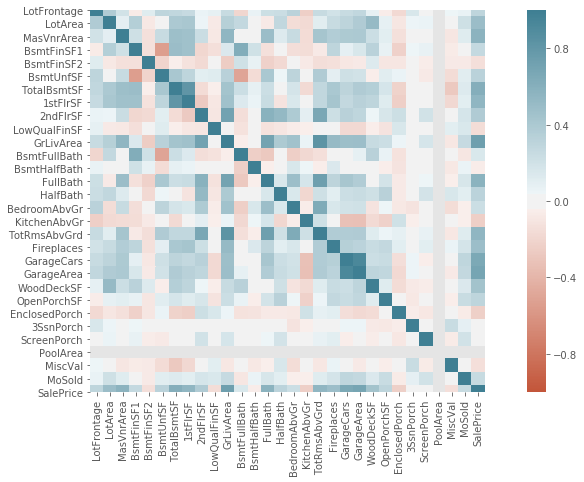

In [13]:
f, ax = plt.subplots(figsize=(15, 10))
plt.subplots_adjust(bottom=0.35)
plt.autoscale()

corr_data = df.corr()
sns.heatmap(corr_data,
            mask=np.zeros_like(corr_data, dtype=np.bool), 
            cmap=sns.diverging_palette(20, 220, as_cmap=True),
            vmin=-1, vmax=1,
            square=True, 
            ax=ax)

fig_name = 'fig_cor_plot.png'
# f.savefig(fig_name,  dpi=70)
graphs_dict['correlation'] = f
plt.show()
# plt.close('all')

# Data profile summary

In [14]:
print('Columns: {0}\t\tRows: {1}'.format(df.shape[0], df.shape[1]))

Columns: 100		Rows: 80


### Overview

In [15]:
data_qlt_df[['column_name', 'col_data_type', '%_of_non_nulls', '%_of_nulls', 'unique_values_count']].head(10)

,column_name,col_data_type,%_of_non_nulls,%_of_nulls,unique_values_count
0,MSSubClass,category,100,0,14
1,MSZoning,category,97,3,3
2,LotFrontage,float32,86,14,44
3,LotArea,float32,100,0,94
4,Street,category,100,0,2
5,Alley,category,6,94,2
6,LotShape,category,100,0,3
7,LandContour,category,100,0,4
8,Utilities,category,100,0,1
9,LotConfig,category,100,0,4


In [16]:
data_qlt_df[data_qlt_df['column_name'] == 'SalePrice'].T

,79
column_name,SalePrice
col_data_type,int64
non_null_values,100
%_of_non_nulls,100
null_values,0
%_of_nulls,0
unique_values_count,93
count,100
mean,173821
std,72236.6


<br />
<br />

### > How empty is too empty?
> Generally columns with large percentage of empty values can be *dropped* from the dataset as they will not add any value to the analysis.

In [17]:
# The empty values threshold can be set to a lower/higher value depending on the size of the data sets 
threshold_perc = 0.75
col_vals_threshold = df.shape[0] * threshold_perc

null_vals_df = data_qlt_df[data_qlt_df['non_null_values'] < col_vals_threshold][['column_name', 'col_data_type', 'non_null_values', '%_of_non_nulls', 'null_values', '%_of_nulls']]

# .style.format({'dtype_memory': "{:,.2f}", 'non_null_values': "{:,.2f}", '%_of_non_nulls': "{:,.2f}", 'null_values': "{:,.2f}", '%_of_nulls': "{:,.2f}",  'unique_values_count': "{:,.2f}"})

In [18]:
# Rehsape the column data type dataframe into form that can be printed in MS Word
# Using .reset_index() will make the index a column
data = round(null_vals_df.sort_values("non_null_values"), 2)

data.drop(columns=['null_values', 'non_null_values'])

,column_name,col_data_type,%_of_non_nulls,%_of_nulls
71,PoolQC,category,0,100
5,Alley,category,6,94
73,MiscFeature,category,9,91
72,Fence,category,23,77
56,FireplaceQu,category,46,54


> The above features are good candidates to be droped.

In [21]:
# shares data with other notebooks

cols_drop = data['column_name']
# %store cols_drop
# %store graphs_dict

Stored 'graphs_dict' (dict)
